In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [7]:
#Data reading and visaulizing tools
import numpy as np
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline

#preprocessing tools
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures, LabelBinarizer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.tree import export_text, plot_tree,export_graphviz

#Ensemble Models
#Bagging Classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Boosting Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier  #Extreme Gradient Boosting

#Artificial Neural Network tools
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

#models performance evaulation tools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

#additional tools
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel

from sklearn import set_config
set_config(display='diagram')


### About this file
Data Set Information:

Cardiotocography (CTG) is a medical test that is used to monitor the fetal heart rate (FHR) and uterine contractions during pregnancy. A cardiotocogram (CTG) is the graphical representation of the results of this test.

During a CTG, two sensors are placed on the mother's abdomen: one to measure the fetal heart rate and the other to detect contractions of the uterus. The results of these measurements are recorded on a graph, which shows the fetal heart rate as a continuous line and the uterine contractions as intermittent spikes.

CTGs are commonly used during the antenatal period to assess fetal well-being and during labor to monitor fetal distress. They can help detect potential problems with the pregnancy or labor, such as fetal distress or hypoxia, and allow healthcare providers to take appropriate action to prevent complications and ensure the safe delivery of the baby.

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. …) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

Attribute Information:

LB - FHR baseline (beats per minute)

AC - # of accelerations per second

FM - # of fetal movements per second

UC - # of uterine contractions per second

DL - # of light decelerations per second

DS - # of severe decelerations per second

DP - # of prolongued decelerations per second

ASTV - percentage of time with abnormal short term variability

MSTV - mean value of short term variability

ALTV - percentage of time with abnormal long term variability

MLTV - mean value of long term variability

Width - width of FHR histogram

Min - minimum of FHR histogram

Max - Maximum of FHR histogram

Nmax - # of histogram peaks

Nzeros - # of histogram zeros

Mode - histogram mode

Mean - histogram mean

Median - histogram median

Variance - histogram variance

Tendency - histogram tendency

CLASS - FHR pattern class code (1 to 10)

NSP - fetal state class code (N=normal; S=suspect; P=pathologic)

In [8]:
pd.options.display.max_columns= None
data=pd.read_excel('/content/drive/MyDrive/Neural Network (DL)/CTG.xls', sheet_name = 1, skiprows = 1)
data

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Unnamed: 31,A,B,C,D,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,120.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,132.0,0.006380,0.000000,0.006380,0.003190,0.000000,0.000000,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,133.0,0.003322,0.000000,0.008306,0.003322,0.000000,0.000000,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,134.0,0.002561,0.000000,0.007682,0.002561,0.000000,0.000000,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,132.0,0.006515,0.000000,0.008143,0.000000,0.000000,0.000000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,NaN,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,NaN,140.0,0.000679,0.000000,0.006110,0.000000,0.000000,0.000000,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,NaN,142.0,0.001616,0.001616,0.008078,0.000000,0.000000,0.000000,74.0,0.4,36.0,5.0,42.0,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,NaN,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,1.0,NaN,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384.0,579.0,53.0,81.0,72.0,332.0,252.0,107.0,69.0,197.0,NaN,NaN,NaN,NaN


In [9]:
#Let's drop the unecessary columns
data.drop(data.iloc[:, :10], inplace = True, axis = 1) 
data.drop(data.iloc[:, 22:33], inplace = True, axis = 1)

In [10]:
data = data.drop(['Unnamed: 31', 'Unnamed: 44'], axis = 1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC.1      2126 non-null   float64
 2   FM.1      2127 non-null   float64
 3   UC.1      2127 non-null   float64
 4   DL.1      2128 non-null   float64
 5   DS.1      2128 non-null   float64
 6   DP.1      2128 non-null   float64
 7   ASTV      2127 non-null   float64
 8   MSTV      2127 non-null   float64
 9   ALTV      2127 non-null   float64
 10  MLTV      2127 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [12]:
data.isna().sum()

LB          3
AC.1        3
FM.1        2
UC.1        2
DL.1        1
DS.1        1
DP.1        1
ASTV        2
MSTV        2
ALTV        2
MLTV        2
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
CLASS       3
NSP         3
dtype: int64

In [13]:
data = data.dropna()
data = data.drop_duplicates()

In [14]:
data.describe()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,133.301655,0.003178,0.009501,0.004375,0.001894,0.000004,0.000157,46.977778,1.335035,9.789598,8.170922,70.511111,93.574468,164.085579,4.075650,0.325296,137.448227,134.596217,138.084161,18.891726,0.318676,4.507801,1.303546
std,9.836399,0.003864,0.046787,0.002935,0.002967,0.000063,0.000581,17.180933,0.884111,18.329675,5.632455,38.997589,29.550040,17.943983,2.951027,0.707507,16.398956,15.607096,14.476729,29.029413,0.611005,3.022826,0.614059
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001919,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000,1.000000
50%,133.000000,0.001637,0.000000,0.004505,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,68.000000,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000,1.000000
75%,140.000000,0.005650,0.002502,0.006536,0.003283,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.000000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000,3.000000


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,2115.0,133.301655,9.836399,106.0,126.000000,133.000000,140.000000,160.000000
AC.1,2115.0,0.003178,0.003864,0.0,0.000000,0.001637,0.005650,0.019284
FM.1,2115.0,0.009501,0.046787,0.0,0.000000,0.000000,0.002502,0.480634
UC.1,2115.0,0.004375,0.002935,0.0,0.001919,0.004505,0.006536,0.014925
DL.1,2115.0,0.001894,0.002967,0.0,0.000000,0.000000,0.003283,0.015385
DS.1,2115.0,0.000004,0.000063,0.0,0.000000,0.000000,0.000000,0.001353
DP.1,2115.0,0.000157,0.000581,0.0,0.000000,0.000000,0.000000,0.005348
ASTV,2115.0,46.977778,17.180933,12.0,32.000000,49.000000,61.000000,87.000000
MSTV,2115.0,1.335035,0.884111,0.2,0.700000,1.200000,1.700000,7.000000
ALTV,2115.0,9.789598,18.329675,0.0,0.000000,0.000000,11.000000,91.000000


In [16]:
data.shape

(2115, 23)

In [17]:
#checking label classes
data['NSP'].unique()

array([2., 1., 3.])

The label has three classes and this a multiclass problem
We are going to use a softmax function as the output activation function.

In [19]:
data['NSP'].value_counts(normalize=True)

1.0    0.779196
2.0    0.138061
3.0    0.082742
Name: NSP, dtype: float64

The class label are not equally distributed.The class 1 has above 78 percent of and class 3 put at the least most has only 8% from whole data set. This mean above 78% from the entair dataset, they are Normal, only 8% are at risk. and rest are suspect.

In [20]:
data['NSP'].value_counts(normalize=False)

1.0    1648
2.0     292
3.0     175
Name: NSP, dtype: int64

### Data Visualization

<AxesSubplot:>

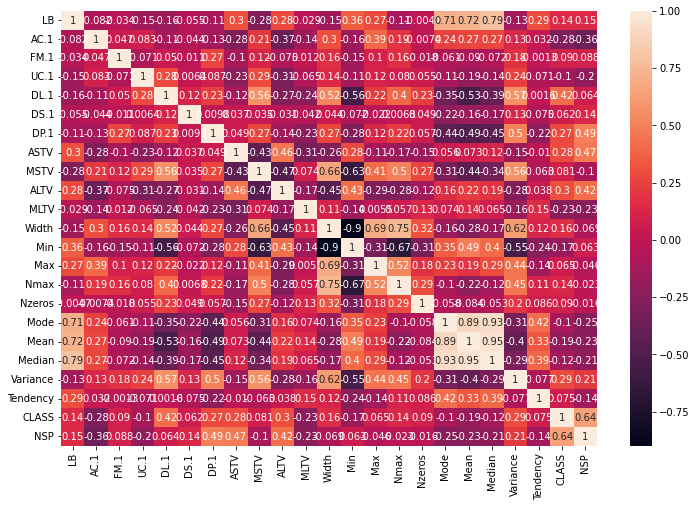

In [21]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

In [27]:
data.corr()['NSP'].sort_values(ascending=False)

NSP         1.000000
CLASS       0.641436
DP.1        0.490237
ASTV        0.469771
ALTV        0.421704
Variance    0.208380
LB          0.146163
DS.1        0.136125
FM.1        0.088067
DL.1        0.063777
Min         0.063353
Nzeros     -0.016158
Nmax       -0.022598
Max        -0.046062
Width      -0.069200
MSTV       -0.101067
Tendency   -0.135648
UC.1       -0.203437
Median     -0.208063
MLTV       -0.225946
Mean       -0.230049
Mode       -0.253326
AC.1       -0.363418
Name: NSP, dtype: float64

The top 5 highly correlated to NSP are Class,Dp.1,ASTV, ALTV ETC

<AxesSubplot:xlabel='NSP', ylabel='CLASS'>

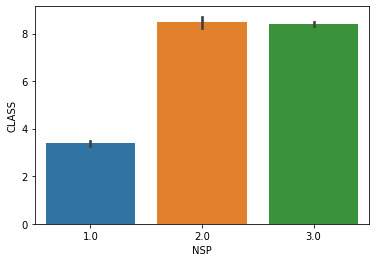

In [31]:
sns.barplot(data=data,x='NSP',y='CLASS')

<AxesSubplot:xlabel='NSP', ylabel='CLASS'>

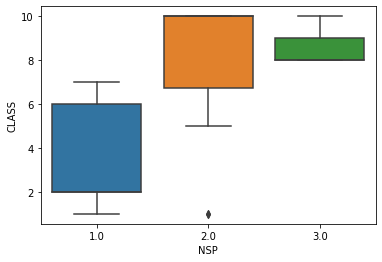

In [32]:
sns.boxplot(data=data,x='NSP',y='CLASS')

(array([  7.,  37.,  44., 106., 204., 199., 309., 279., 298., 147., 245.,
        144.,  57.,  12.,  27.]),
 array([106. , 109.6, 113.2, 116.8, 120.4, 124. , 127.6, 131.2, 134.8,
        138.4, 142. , 145.6, 149.2, 152.8, 156.4, 160. ]),
 <BarContainer object of 15 artists>)

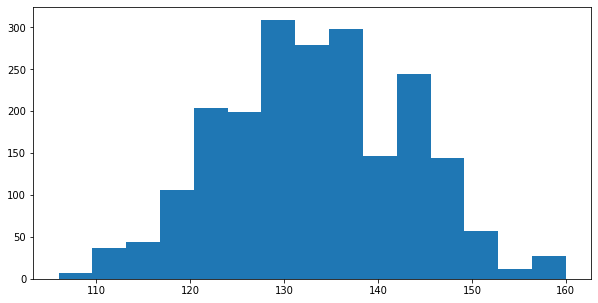

In [33]:
#Histogram of the fetal Heart Rate
fig=plt.figure(figsize=(10,5))
plt.hist(data['LB'], bins=15)

In [ ]:
#Histogram of the Uterine contraction
fig=plt.figure(figsize=(10,5))
plt.hist(data['UC.1'], bins=10)

### Prepare the data

In [34]:
X=data.drop('NSP', axis=1)
y=data['NSP']

In [36]:
#First encoding the classes
lb=LabelBinarizer()
y_ohe=lb.fit_transform(y)

In [37]:
y_ohe

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

### Split the data and scale the data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.30, random_state=42)

In [39]:
#scale the data
scaler=StandardScaler()
scaled_train=scaler.fit_transform(X_train)
scaled_test=scaler.transform(X_test)

In [40]:
X_train=pd.DataFrame(data=scaled_train, columns=X.columns)
X_test=pd.DataFrame(data=scaled_test, columns=X.columns)

In [41]:
X_train.shape

(1480, 22)

#Prepare the ANN model

In [42]:
model=Sequential()
model.add(Dense(units=22,activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=4, activation='relu'))

model.add(Dense(units=3,activation='softmax'))

#compile the model
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              loss_weights=None,
              weighted_metrics=None,
              run_eagerly=None,
              steps_per_execution=None,
              jit_compile=None)

In [44]:
#fit the model
history=model.fit(X_train,y_train,batch_size=128,epochs=400,validation_data=(X_test,y_test),verbose=1)

Epoch 1/400
12/12 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.9905 - val_loss: 0.1302 - val_accuracy: 0.9622
Epoch 2/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0367 - accuracy: 0.9919 - val_loss: 0.1279 - val_accuracy: 0.9638
Epoch 3/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0361 - accuracy: 0.9926 - val_loss: 0.1321 - val_accuracy: 0.9606
Epoch 4/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0358 - accuracy: 0.9919 - val_loss: 0.1275 - val_accuracy: 0.9669
Epoch 5/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0354 - accuracy: 0.9912 - val_loss: 0.1289 - val_accuracy: 0.9638
Epoch 6/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0346 - accuracy: 0.9932 - val_loss: 0.1302 - val_accuracy: 0.9606
Epoch 7/400
12/12 [==============================] - 0s 8ms/step - loss: 0.0340 - accuracy: 0.9946 - val_loss: 0.1327 - val_accuracy: 0.9622
Epoch 8/400


In [46]:
result_df=pd.DataFrame(model.history.history)
result_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.037489,0.990541,0.130182,0.962205
1,0.036674,0.991892,0.127940,0.963780
2,0.036113,0.992568,0.132143,0.960630
3,0.035805,0.991892,0.127457,0.966929
4,0.035376,0.991216,0.128901,0.963780


In [48]:
losses=result_df.loc[:,['loss','val_loss']]
accuracyies=result_df.loc[:,['accuracy','val_accuracy']]

<AxesSubplot:>

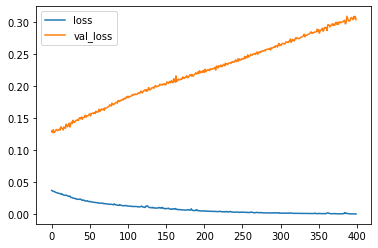

In [49]:
losses.plot()

This is defnitly overfit

In [50]:
model=Sequential()
model.add(Dense(units=22,activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=4, activation='relu'))

model.add(Dense(units=3,activation='softmax'))

#compile the model
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              loss_weights=None,
              weighted_metrics=None,
              run_eagerly=None,
              steps_per_execution=None,
              jit_compile=None)

In [51]:
ealy_stop=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="min",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [52]:
#fit the model
history=model.fit(X_train,y_train,batch_size=128,epochs=400,validation_data=(X_test,y_test),verbose=1,callbacks=[ealy_stop])

Epoch 1/400
12/12 [==============================] - 1s 20ms/step - loss: 1.2116 - accuracy: 0.2514 - val_loss: 1.1279 - val_accuracy: 0.3685
Epoch 2/400
12/12 [==============================] - 0s 7ms/step - loss: 1.1053 - accuracy: 0.4176 - val_loss: 1.0570 - val_accuracy: 0.5213
Epoch 3/400
12/12 [==============================] - 0s 7ms/step - loss: 1.0460 - accuracy: 0.5520 - val_loss: 1.0103 - val_accuracy: 0.6346
Epoch 4/400
12/12 [==============================] - 0s 6ms/step - loss: 0.9994 - accuracy: 0.6547 - val_loss: 0.9668 - val_accuracy: 0.7134
Epoch 5/400
12/12 [==============================] - 0s 6ms/step - loss: 0.9505 - accuracy: 0.7338 - val_loss: 0.9158 - val_accuracy: 0.7669
Epoch 6/400
12/12 [==============================] - 0s 6ms/step - loss: 0.8892 - accuracy: 0.7872 - val_loss: 0.8484 - val_accuracy: 0.8063
Epoch 7/400
12/12 [==============================] - 0s 7ms/step - loss: 0.8128 - accuracy: 0.8243 - val_loss: 0.7684 - val_accuracy: 0.8441
Epoch 8/400


In [53]:
result_df=pd.DataFrame(model.history.history)
result_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.211573,0.251351,1.127916,0.368504
1,1.105254,0.417568,1.057019,0.521260
2,1.045970,0.552027,1.010307,0.634646
3,0.999385,0.654730,0.966756,0.713386
4,0.950478,0.733784,0.915754,0.766929


In [54]:
losses=result_df.loc[:,['loss','val_loss']]
accuracyies=result_df.loc[:,['accuracy','val_accuracy']]

<AxesSubplot:>

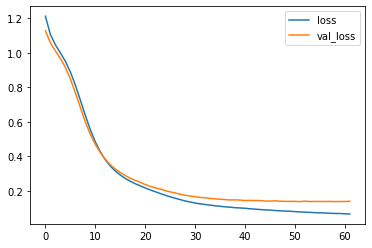

In [55]:
losses.plot()

The now almost overcome the overfrit problem.

In [56]:
model=Sequential()
model.add(Dense(units=22,activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=3,activation='softmax'))

#compile the model
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              loss_weights=None,
              weighted_metrics=None,
              run_eagerly=None,
              steps_per_execution=None,
              jit_compile=None)

In [57]:
ealy_stop=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="min",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [58]:
#fit the model
history=model.fit(X_train,y_train,batch_size=128,epochs=400,validation_data=(X_test,y_test),verbose=1,callbacks=[ealy_stop])

Epoch 1/400
12/12 [==============================] - 2s 29ms/step - loss: 1.2869 - accuracy: 0.1696 - val_loss: 1.1368 - val_accuracy: 0.2331
Epoch 2/400
12/12 [==============================] - 0s 10ms/step - loss: 1.1392 - accuracy: 0.3014 - val_loss: 1.0304 - val_accuracy: 0.4945
Epoch 3/400
12/12 [==============================] - 0s 10ms/step - loss: 1.0368 - accuracy: 0.4682 - val_loss: 0.9567 - val_accuracy: 0.7354
Epoch 4/400
12/12 [==============================] - 0s 10ms/step - loss: 0.9811 - accuracy: 0.5791 - val_loss: 0.9005 - val_accuracy: 0.8189
Epoch 5/400
12/12 [==============================] - 0s 9ms/step - loss: 0.9150 - accuracy: 0.6709 - val_loss: 0.8500 - val_accuracy: 0.8614
Epoch 6/400
12/12 [==============================] - 0s 10ms/step - loss: 0.8783 - accuracy: 0.7223 - val_loss: 0.7973 - val_accuracy: 0.8709
Epoch 7/400
12/12 [==============================] - 0s 10ms/step - loss: 0.8234 - accuracy: 0.7601 - val_loss: 0.7412 - val_accuracy: 0.8787
Epoch 8

In [59]:
result_df=pd.DataFrame(model.history.history)
result_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.286920,0.169595,1.136787,0.233071
1,1.139222,0.301351,1.030389,0.494488
2,1.036805,0.468243,0.956710,0.735433
3,0.981119,0.579054,0.900550,0.818898
4,0.915002,0.670946,0.850038,0.861417


In [60]:
losses=result_df.loc[:,['loss','val_loss']]
accuracyies=result_df.loc[:,['accuracy','val_accuracy']]

<AxesSubplot:>

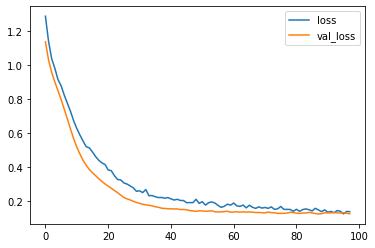

In [61]:
losses.plot()

The overfit is undercontrol

In [69]:
y_pred=model.predict(X_test)
y_pred

20/20 [==============================] - 0s 3ms/step


array([[1.0000000e+00, 5.8546536e-11, 1.3982279e-10],
       [1.0000000e+00, 3.1723001e-08, 4.6731600e-08],
       [9.9998558e-01, 5.6618514e-06, 8.8544093e-06],
       ...,
       [9.9999964e-01, 1.7527447e-07, 2.2443272e-07],
       [9.9996138e-01, 1.6354024e-05, 2.2293456e-05],
       [1.4848986e-02, 1.5389508e-01, 8.3125597e-01]], dtype=float32)

In [71]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

20/20 [==============================] - 0s 2ms/step
[[485   3   2]
 [  4  89   0]
 [  3   6  43]]


In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       490
           1       0.91      0.96      0.93        93
           2       0.96      0.83      0.89        52

    accuracy                           0.97       635
   macro avg       0.95      0.92      0.94       635
weighted avg       0.97      0.97      0.97       635

